Bilježnica jednaka https://www.kaggle.com/code/anaterovic/mn-0036517166-explanatory-data-analysis-eda-og čija je posljednja verzija spremljena do predviđenog roka.

# Mandatory notebook 1 - Explanatory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import copy
from fitter import Fitter, get_common_distributions, get_distributions
import warnings
from sklearn.preprocessing import LabelEncoder 
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
import os
os.listdir("/kaggle/input/")

['dapprojekt22']

## Import data

In [3]:
data = pd.read_csv("/kaggle/input/dapprojekt22/train.csv")
data

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME,NEXT_HOME,NEXT_AWAY,NEXT_WINNER,NEXT_WEIGHT
0,17,17,0.472,0.500,12.7,13.8,0.89,0.81,18,6,...,19,14,0.452,0.424,0.197,0.198,MIA,CHI,0.0,1.489674
1,23,26,0.657,0.703,17.0,19.9,1.21,1.30,7,4,...,18,26,0.375,0.591,0.198,0.196,LAL,LAC,0.0,5.361710
2,27,23,0.659,0.548,19.8,15.6,1.69,1.21,6,4,...,18,27,0.462,0.435,0.200,0.200,CLE,BKN,0.0,2.357026
3,24,21,0.727,0.600,18.2,15.7,1.60,1.50,3,8,...,20,21,0.426,0.525,0.200,0.195,PHI,MIA,0.0,5.980445
4,30,24,0.714,0.558,21.5,18.1,1.58,1.33,1,0,...,32,26,0.485,0.520,0.200,0.200,TOR,BOS,0.0,1.283159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,31,41,0.775,0.732,20.9,27.3,1.94,3.15,8,0,...,23,27,0.404,0.574,0.200,0.200,GSW,MEM,0.0,1.047307
3686,25,35,0.595,0.761,17.5,24.0,1.92,2.06,7,1,...,22,35,0.386,0.547,0.200,0.200,LAL,UTA,0.0,2.565129
3687,27,19,0.692,0.463,20.7,15.2,1.93,1.36,3,1,...,23,15,0.442,0.455,0.198,0.198,PHX,LAC,0.0,1.540541
3688,23,26,0.535,0.578,16.5,17.1,1.53,1.53,5,6,...,28,19,0.459,0.388,0.200,0.198,POR,DEN,0.0,1.233932


In [4]:
data.describe()

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,UFGA_AWAY,UFGA_HOME,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME,NEXT_WINNER,NEXT_WEIGHT
count,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,...,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000
mean,21.539295,22.678591,0.575057,0.592418,16.497615,17.216558,1.613978,1.729981,5.040921,4.602439,...,45.225745,44.994309,19.646341,19.961518,0.433515,0.442661,0.198803,0.198821,0.418699,1.965363
std,4.875762,5.038394,0.103159,0.101621,3.152195,3.233940,0.653318,0.731551,2.641743,2.468658,...,7.323952,7.201527,4.555417,4.626656,0.076727,0.078773,0.001565,0.001524,0.493413,1.276170
min,6.000000,9.000000,0.200000,0.237000,5.600000,7.500000,0.320000,0.420000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187000,0.191000,0.000000,1.013453
25%,18.000000,19.000000,0.500000,0.525000,14.300000,15.000000,1.150000,1.250000,3.000000,3.000000,...,40.000000,40.000000,17.000000,17.000000,0.385000,0.391000,0.198000,0.198000,0.000000,1.288919
50%,21.000000,23.000000,0.576000,0.595000,16.550000,17.200000,1.500000,1.590000,5.000000,4.000000,...,45.000000,45.000000,20.000000,20.000000,0.435000,0.442000,0.200000,0.200000,0.000000,1.586025
75%,25.000000,26.000000,0.646000,0.667000,18.600000,19.400000,1.920000,2.070000,7.000000,6.000000,...,50.000000,49.000000,23.000000,23.000000,0.485000,0.491000,0.200000,0.200000,1.000000,2.157992
max,41.000000,42.000000,0.907000,0.933000,28.100000,30.100000,6.800000,10.000000,18.000000,15.000000,...,81.000000,75.000000,42.000000,37.000000,0.688000,0.705000,0.200000,0.200000,1.000000,24.531710


In [5]:
data_test = pd.read_csv("/kaggle/input/dapprojekt22/test.csv")
data_test

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,UFGA_HOME,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME,NEXT_HOME,NEXT_AWAY,id
0,17,31,0.531,0.689,13.0,20.9,0.94,2.07,5,6,...,46,14,21,0.318,0.457,0.200,0.198,POR,UTA,0
1,19,22,0.475,0.564,15.6,18.4,1.36,1.69,3,5,...,27,10,17,0.345,0.630,0.194,0.198,GSW,SAS,1
2,25,24,0.532,0.600,16.8,18.1,1.79,1.50,6,3,...,42,23,18,0.460,0.429,0.198,0.200,ORL,MIA,2
3,27,20,0.574,0.588,18.9,15.1,2.25,1.82,4,7,...,36,17,15,0.436,0.417,0.197,0.200,IND,DAL,3
4,26,30,0.578,0.638,17.0,19.5,1.73,1.88,6,8,...,48,23,24,0.397,0.500,0.200,0.200,BOS,BKN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,19,21,0.633,0.538,15.9,17.3,0.95,2.10,7,4,...,36,15,15,0.441,0.417,0.196,0.200,UTA,SAS,1225
1226,16,24,0.410,0.615,13.0,18.9,1.07,1.41,5,2,...,40,21,20,0.477,0.500,0.200,0.198,LAC,SAC,1226
1227,27,29,0.675,0.674,21.6,22.5,2.45,4.83,6,1,...,47,22,18,0.537,0.383,0.198,0.200,GSW,LAL,1227
1228,23,26,0.561,0.634,16.4,17.7,1.28,1.24,8,2,...,47,16,19,0.381,0.404,0.200,0.198,POR,NOP,1228


In [6]:
label_encoder = LabelEncoder()

for feature in data:
    if data[feature].dtype.name == "object":
        data[feature] = label_encoder.fit_transform(data[feature])
        
for feature in data_test:
    if data_test[feature].dtype.name == "object":
        data_test[feature] = label_encoder.fit_transform(data_test[feature])

## Data dimensionality

In [7]:
data.shape

(3690, 230)

Train dataset has <b>230</b> features and <b>3689</b> samples.

In [8]:
data_test.shape

(1230, 229)

Test dataset has <b>229</b> features and <b>1230<b/> samples.

## Missing values

In [9]:
df = pd.DataFrame(data)
df_test = pd.DataFrame(data_test)

In [10]:
df.isnull()

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME,NEXT_HOME,NEXT_AWAY,NEXT_WINNER,NEXT_WEIGHT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
sum_missing = df.isnull().sum()
features = df.columns
print("Features with missing values:")
missing_features = []
for i in range (len(sum_missing)):
    if sum_missing[i] != 0:
        print(features[i] + ": "+ str(sum_missing[i]))
        missing_features.append(features[i])

Features with missing values:
BOX_OUTS_AWAY: 3689
BOX_OUTS_HOME: 3689
CHARGES_DRAWN_AWAY: 3689
CHARGES_DRAWN_HOME: 3689
CONTESTED_SHOTS_2PT_AWAY: 3689
CONTESTED_SHOTS_2PT_HOME: 3689
CONTESTED_SHOTS_3PT_AWAY: 3689
CONTESTED_SHOTS_3PT_HOME: 3689
CONTESTED_SHOTS_AWAY: 3689
CONTESTED_SHOTS_HOME: 3689
DEFLECTIONS_AWAY: 3689
DEFLECTIONS_HOME: 3689
LOOSE_BALLS_RECOVERED_AWAY: 3689
LOOSE_BALLS_RECOVERED_HOME: 3689
SCREEN_ASSISTS_AWAY: 3689
SCREEN_ASSISTS_HOME: 3689


Since all the features that have missing values don't have all the values we will <b>drop features with missing values</b> from the dataset.

In [12]:
for feature in missing_features:
    data.drop(feature,axis=1, inplace=True)
    data_test.drop(feature,axis=1, inplace=True)

In [13]:
data.shape

(3690, 214)

In [14]:
data_test.shape

(1230, 213)

We have removed 18 features.

## Outliers

In [15]:
df_num = data

In [16]:
def outliers_hist(df_num):
    outliers = set()
    outlier_values = []
    outliers_id = dict()
    num = 0
    print("Outliers:")
    for feature_name in df_num:
        feature = df_num[feature_name]

        std = np.std(feature)
        mean = np.mean(feature)
        iqr = 3 * std

        lower = mean - iqr
        upper = mean + iqr

        values = []
        i =0
        for sample in feature:
            if sample < lower or sample > upper:
                outliers.add(feature_name)
                num += 1
                values.append(sample)
                if i in outliers_id:
                    outliers_id[i] += 1
                else:
                    outliers_id[i] = 1
            i += 1
        if (len(values) != 0):
            print(feature_name + ": "+ str(values))
        
    return outliers, outliers_id, num

outliers, outliers_id, num = outliers_hist(df_num)
            
print(len(outliers))
print(num)

Outliers:
AST_AWAY: [41, 37, 38, 39, 39, 37, 37, 6, 37, 37, 39, 37, 38, 37, 37]
AST_HOME: [38, 42, 38, 38, 41, 39, 38, 38, 41, 42, 38, 39, 40, 40, 39, 38, 40, 41]
AST_PCT_AWAY: [0.263, 0.226, 0.258, 0.907, 0.2, 0.261, 0.226, 0.231]
AST_PCT_HOME: [0.933, 0.273, 0.237]
AST_RATIO_AWAY: [6.7, 6.2, 6.9, 5.6, 7.0, 28.1, 6.7, 26.6, 26.5]
AST_RATIO_HOME: [30.1, 27.5, 27.8, 28.8, 27.9, 7.5, 27.3]
AST_TOV_AWAY: [4.0, 4.38, 4.0, 4.33, 4.11, 3.71, 5.75, 3.71, 5.2, 3.78, 4.29, 3.83, 4.0, 4.43, 4.0, 3.83, 3.67, 4.0, 4.5, 3.63, 3.67, 3.83, 4.0, 4.8, 3.75, 4.0, 3.83, 4.2, 3.63, 3.83, 4.0, 5.83, 5.0, 4.43, 4.17, 3.71, 4.57, 5.2, 3.83, 3.86, 4.13, 3.8, 3.71, 4.33, 5.5, 3.71, 4.2, 3.75, 4.0, 6.8, 5.75, 3.86]
AST_TOV_HOME: [4.5, 4.33, 4.0, 7.25, 4.2, 4.33, 4.25, 4.6, 5.25, 4.67, 10.0, 5.43, 4.38, 4.57, 5.6, 4.33, 4.11, 4.2, 4.83, 6.5, 4.14, 4.86, 4.0, 5.4, 4.2, 5.5, 5.17, 4.83, 4.0, 5.5, 7.0, 5.25, 7.0, 4.83, 4.2, 4.83, 4.0, 4.2, 4.0, 4.33, 6.25, 4.5, 5.6, 5.17, 4.13, 4.25, 4.5, 4.25, 4.0, 4.33, 4.67, 4.2

In [17]:
for key in outliers_id.keys():
    value = outliers_id[key]
    if value > 10:
        print(str(key)+": "+ str(value))

578: 32
2413: 13
1160: 12
3685: 14
102: 17
1349: 14
2510: 20
36: 30
250: 30
960: 30
1346: 30
1658: 30
1814: 30
2251: 17
2741: 30
2850: 24
3047: 30
3278: 11
1619: 14
3133: 11
863: 11
915: 15
1357: 11


Since a lot of features have outliers and it seems like most of them are natural we will only drop samples that are outliers in more than 10 features.

In [18]:
for key in outliers_id.keys():
    value = outliers_id[key]
    if value > 10:
        df_num.drop(key,inplace = True)

In [19]:
df_num

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME,NEXT_HOME,NEXT_AWAY,NEXT_WINNER,NEXT_WEIGHT
0,17,17,0.472,0.500,12.7,13.8,0.89,0.81,18,6,...,19,14,0.452,0.424,0.197,0.198,15,4,0.0,1.489674
1,23,26,0.657,0.703,17.0,19.9,1.21,1.30,7,4,...,18,26,0.375,0.591,0.198,0.196,13,12,0.0,5.361710
2,27,23,0.659,0.548,19.8,15.6,1.69,1.21,6,4,...,18,27,0.462,0.435,0.200,0.200,5,1,0.0,2.357026
3,24,21,0.727,0.600,18.2,15.7,1.60,1.50,3,8,...,20,21,0.426,0.525,0.200,0.195,22,15,0.0,5.980445
4,30,24,0.714,0.558,21.5,18.1,1.58,1.33,1,0,...,32,26,0.485,0.520,0.200,0.200,27,2,0.0,1.283159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,28,23,0.718,0.622,20.1,17.6,1.65,1.53,3,3,...,18,19,0.346,0.404,0.200,0.200,17,18,0.0,1.164684
3686,25,35,0.595,0.761,17.5,24.0,1.92,2.06,7,1,...,22,35,0.386,0.547,0.200,0.200,13,28,0.0,2.565129
3687,27,19,0.692,0.463,20.7,15.2,1.93,1.36,3,1,...,23,15,0.442,0.455,0.198,0.198,23,12,0.0,1.540541
3688,23,26,0.535,0.578,16.5,17.1,1.53,1.53,5,6,...,28,19,0.459,0.388,0.200,0.198,24,7,0.0,1.233932


We have dropped 23 samples.

## Feature distribution

### Features with constant values

Firstly let's remove features that have only one value.

<AxesSubplot:title={'center':'Number of unique values per column'}>

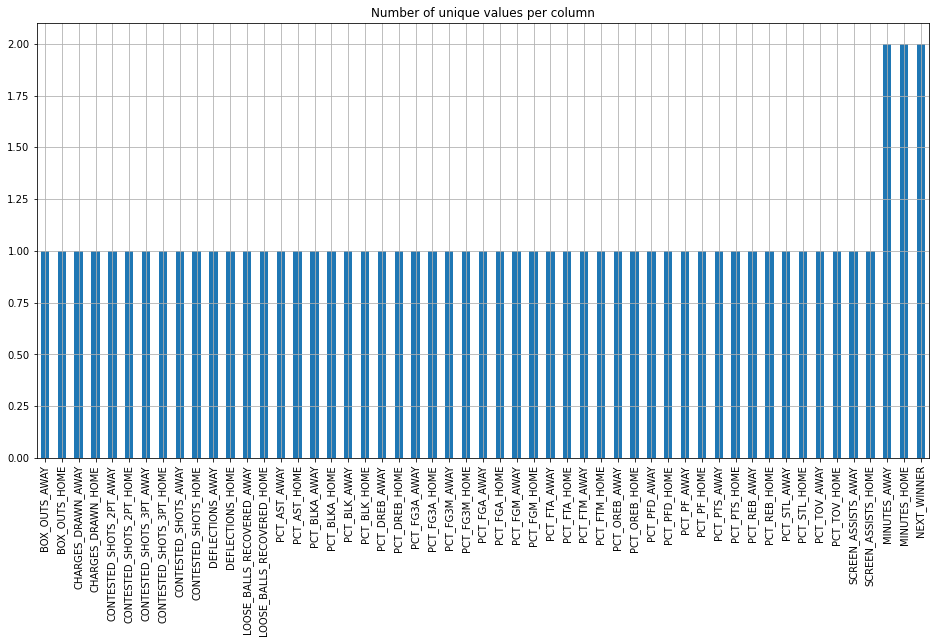

In [20]:
df.nunique().nsmallest(53).plot(kind="bar", title="Number of unique values per column", grid='bool', figsize=(16,8))

This graph shows us that there are 50 features that only contain one value.

In [21]:
df =df_num.loc[:, df_num.apply(pd.Series.nunique) != 1]
df_test = df_test.loc[:, df_test.apply(pd.Series.nunique) != 1]

### Normal distribution

One of the <b>common assumptions</b> in statistical tests and classifiers is the normality of the data. </br> 
We will check normality first by performing <b>statistical tests</b> Lillieforst and Shapiro-Wilk. For the features we can't reject the null hypothesis that the data is normaly distributed we will <b>graph</b> them with histograms, boxplots and qq plots. 

#### Lillieforst test

$H_{0}$: the data comes from the normal distribution <br/>
$H_{1}$: the data does not come from the normal distribution

In [22]:
def normality_lillieforst(data):
    
    normal_features = []
    
    for feature_name in data:

        value = sm.stats.diagnostic.lilliefors(data[feature_name], dist='norm', pvalmethod='approx')[1]
    
        if value > 0.05:
            normal_features.append(feature_name)
    return normal_features

In [23]:
df_new = copy.deepcopy(df)
df_new.drop("TEAM_ID_AWAY", axis =1, inplace = True)
df_new.drop("TEAM_ID_HOME", axis =1, inplace = True)

In [24]:
normal_features_lillie = normality_lillieforst(df_new)
print(normal_features_lillie)
print(len(normal_features_lillie))

['AST_RATIO_AWAY', 'AST_RATIO_HOME', 'DEF_RATING_AWAY', 'DEF_RATING_HOME', 'OFF_RATING_AWAY', 'OFF_RATING_HOME', 'PCT_PTS_PAINT_AWAY']
7


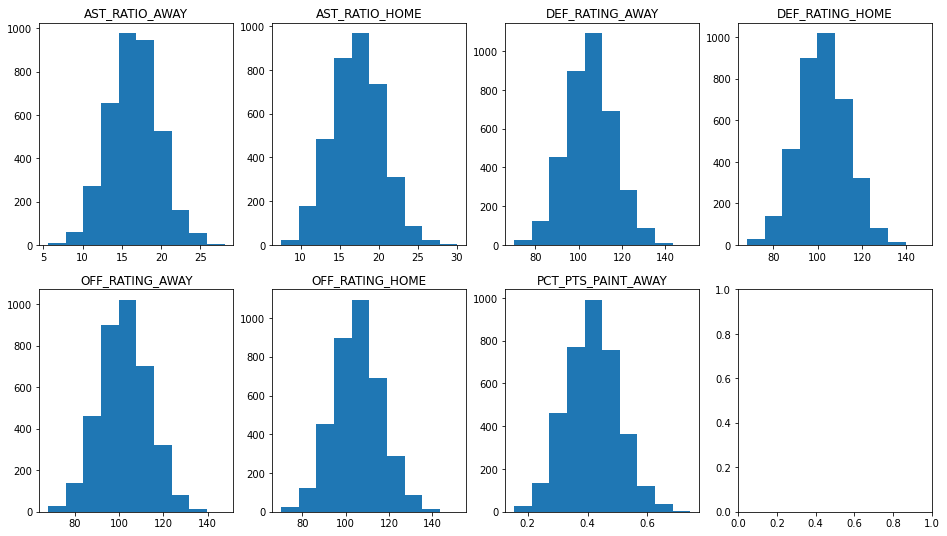

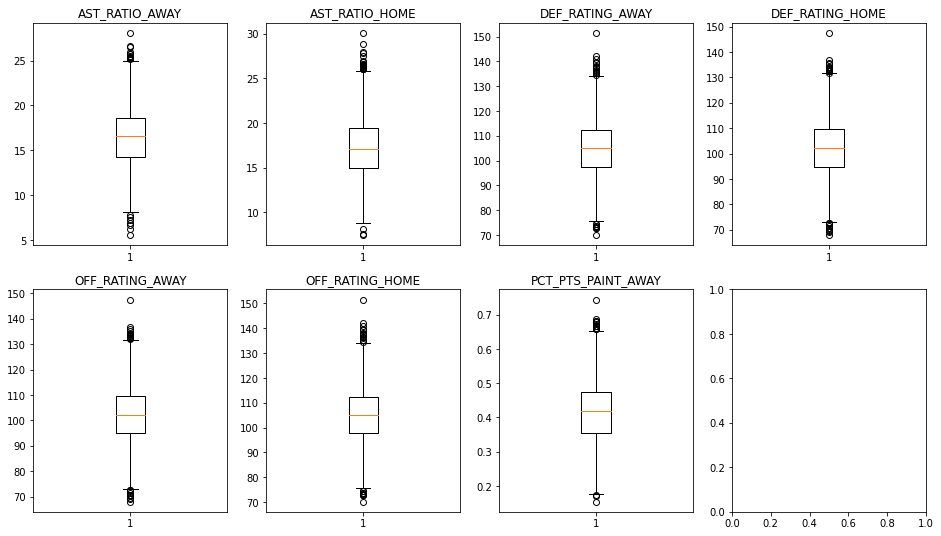

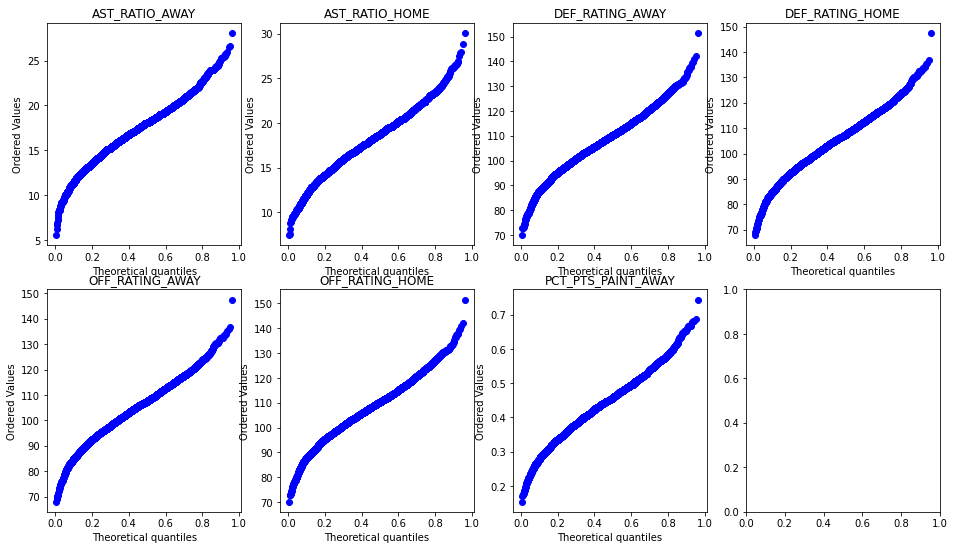

In [25]:
fig, axs = plt.subplots(2, 4, figsize=(16,9))
i = 0
for normal_feature in normal_features_lillie:
    if i < 4:
        axs[0, i].hist(df_num[normal_feature])
        axs[0, i].set_title(normal_feature)
    else:
        axs[1, i-4].hist(df_num[normal_feature])
        axs[1, i-4].set_title(normal_feature)
    i += 1
    
fig, axs = plt.subplots(2, 4, figsize=(16,9))
i = 0
for normal_feature in normal_features_lillie:
    if i < 4:
        axs[0, i].boxplot(df_num[normal_feature])
        axs[0, i].set_title(normal_feature)
    else:
        axs[1, i-4].boxplot(df_num[normal_feature])
        axs[1, i-4].set_title(normal_feature)
    i += 1

fig, axs = plt.subplots(2, 4, figsize=(16,9))
i = 0
for normal_feature in normal_features_lillie:
    if i < 4:
        stats.probplot(df_num[normal_feature], dist=stats.beta, sparams=(2,3), plot=axs[0, i], fit=False)
        axs[0, i].set_title(normal_feature)
    else:
        stats.probplot(df_num[normal_feature], dist=stats.beta, sparams=(2,3), plot=axs[1, i-4], fit=False)
        axs[1, i-4].set_title(normal_feature)
    i += 1



Lillieforst has given us 6 features for which we can't reject that they are normaly distributed and by looking at their graphs we can assume that the data is normaly distributed.

#### Shapiro-Wilk test

$H_{0}$: the data comes from the normal distribution <br/>
$H_{1}$: the data does not come from the normal distribution

In [26]:
def normality_shapiro(data):
    
    normal_features = []
    
    for feature_name in data:

        value = stats.shapiro(data[feature_name]).pvalue
    
        if value > 0.1:
            normal_features.append(feature_name)
    return normal_features

In [27]:
normal_features_shapiro = normality_shapiro(df_new)
print(normal_features_shapiro)
print(len(normal_features_shapiro))

['AST_RATIO_AWAY', 'DEF_RATING_AWAY', 'DEF_RATING_HOME', 'DFG_PCT_AWAY', 'DFG_PCT_HOME', 'OFF_RATING_AWAY', 'OFF_RATING_HOME', 'PCT_AST_2PM_AWAY', 'PCT_UAST_2PM_AWAY', 'REB_PCT_AWAY', 'REB_PCT_HOME', 'UFG_PCT_AWAY', 'UFG_PCT_HOME']
13


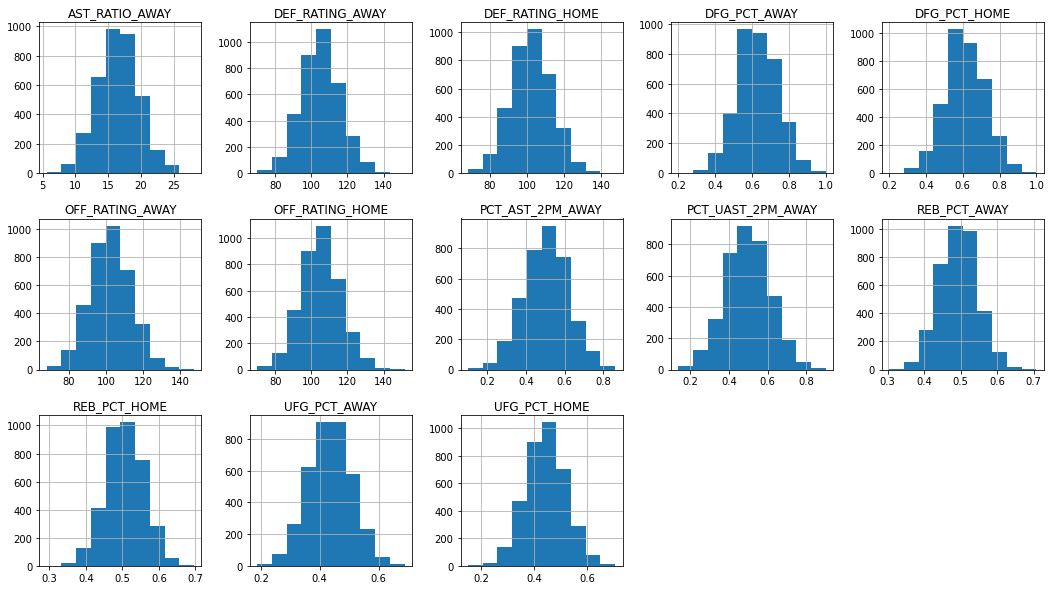

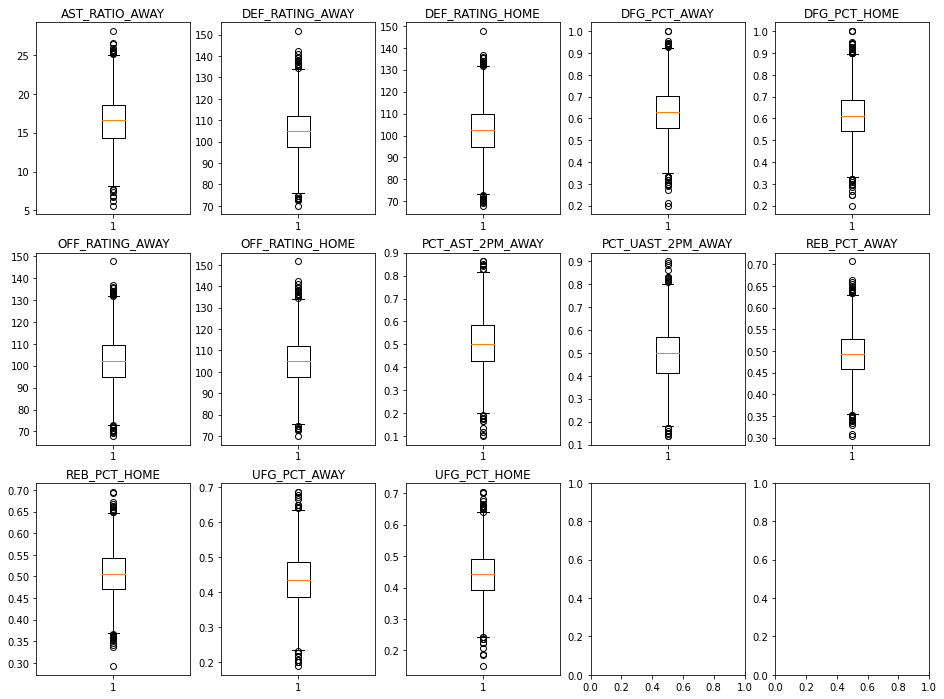

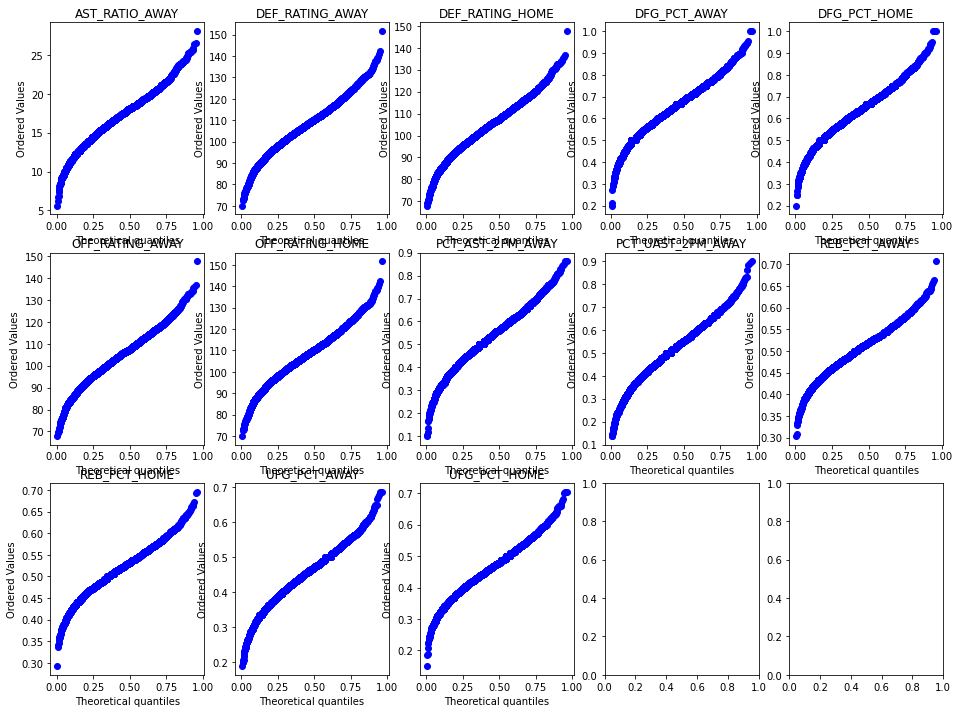

In [28]:
hist = df_num[normal_features_shapiro].hist(layout=(3,5), figsize=(18,10))
fig, axs = plt.subplots(3, 5, figsize=(16,12))
i = 0
for normal_feature in normal_features_shapiro:
    if i < 5:
        axs[0, i].boxplot(df_num[normal_feature])
        axs[0, i].set_title(normal_feature)
    elif i < 10:
        axs[1, i-5].boxplot(df_num[normal_feature])
        axs[1, i-5].set_title(normal_feature)
    elif i < 13:
        axs[2, i-10].boxplot(df_num[normal_feature])
        axs[2, i-10].set_title(normal_feature)
    i += 1
fig, axs = plt.subplots(3, 5, figsize=(16,12))
i = 0
for normal_feature in normal_features_shapiro:
    if i < 5:
        stats.probplot(df_num[normal_feature], dist=stats.beta, sparams=(2,3), plot=axs[0, i], fit=False)
        axs[0, i].set_title(normal_feature)
    elif i < 10:
        stats.probplot(df_num[normal_feature], dist=stats.beta, sparams=(2,3), plot=axs[1, i-5], fit=False)
        axs[1, i-5].set_title(normal_feature)
    elif i < 13:
        stats.probplot(df_num[normal_feature], dist=stats.beta, sparams=(2,3), plot=axs[2, i-10], fit=False)
        axs[2, i-10].set_title(normal_feature)
    i += 1

Shapiro-Wilk has given us 13 features for which we can't reject that they are normaly distributed and by looking at their graphs we can assume that the data is normaly distributed.

<b> Normaly distributed are 14 features:</b> <br>
AST_RATIO_AWAY, DEF_RATING_AWAY, DEF_RATING_HOME, OFF_RATING_AWAY, OFF_RATING_HOME, PCT_PTS_PAINT_AWAY, FG_PCT_AWAY, PCT_AST_2PM_AWAY, PCT_UAST_2PM_AWAY, REB_PCT_AWAY, REB_PCT_HOME, ACT_PCT_AWAY, PCT_AST_FGM_AWAY, PCT_UAST_FGM_AWAY


## Uniform distribution

While we were testing features for normality we had to remove two feature in order to avoid errors. Upon graphing those features we have noticed they looked uniformaly distributed. Now we will show those graphs and test uniformity with chi-square test.

### Chi-square test

$H_{0}$: the data comes from the uniform distribution <br/>
$H_{1}$: the data does not come from the uniform distribution

Text(0.5, 1.0, 'TEAM_ID_AWAY')

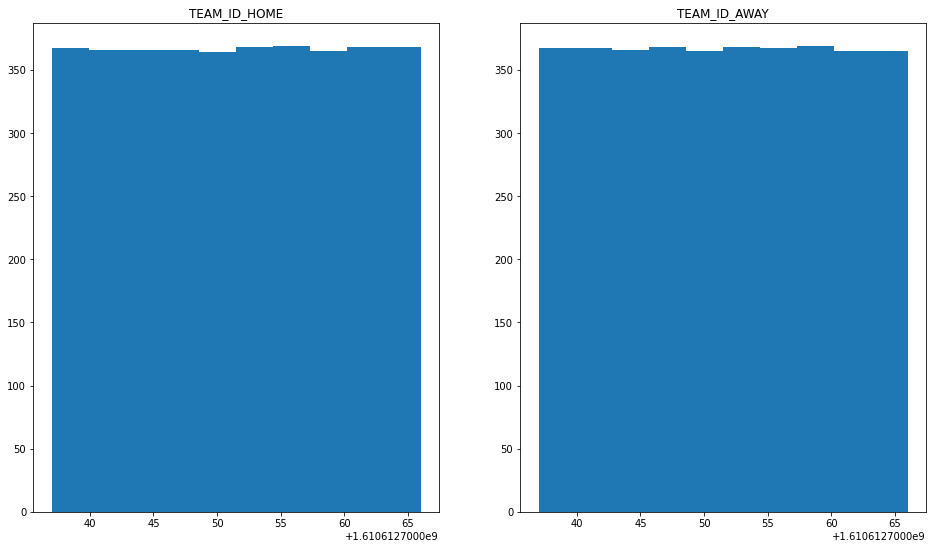

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16,9))
axs[0].hist(df_num["TEAM_ID_HOME"])
axs[0].set_title("TEAM_ID_HOME")
axs[1].hist(df_num["TEAM_ID_AWAY"])
axs[1].set_title("TEAM_ID_AWAY")

In [30]:
p_value = stats.chisquare(data["TEAM_ID_HOME"])[1] 
print("p-value TEAM_ID_AWAY: "+ str(p_value))
p_value = stats.chisquare(data["TEAM_ID_HOME"])[1] 
print("p-value TEAM_ID_HOME: "+ str(p_value))

p-value TEAM_ID_AWAY: 1.0
p-value TEAM_ID_HOME: 1.0


By looking at graphed data and the p-value we can conclude that these two features and uniformly distributed.

### Other distributions

Now we will use Python's Fitter Library in order to find the distribution that fits our data the best.

In [31]:
d_f= dict()
d_f["gamma"] = []
d_f["lognorm"] = []
d_f["beta"] = []
d_f["uniform"] = []
d_f["norm"] = []
d_f["chi"] = []

for feature_name in df:
    f = Fitter(data[feature_name], distributions=['gamma','lognorm', "beta", "uniform","norm", "chi"])    
    f.fit()
    key = list(f.get_best(method="sumsquare_error").keys())[0]
    d_f[key].append(feature_name)

for key in d_f.keys():
    print(key+" ["+str(len(d_f[key]))+"]:"+ str(d_f[key])+"\n")

gamma [19]:['CFGA_HOME', 'DFGA_HOME', 'DFGM_AWAY', 'DFGM_HOME', 'DFG_PCT_AWAY', 'DREB_HOME', 'FG3M_AWAY', 'FGM_AWAY', 'OPP_PTS_2ND_CHANCE_AWAY', 'OPP_PTS_PAINT_HOME', 'ORBC_AWAY', 'PCT_PTS_FB_HOME', 'PCT_UAST_3PM_AWAY', 'PTS_2ND_CHANCE_HOME', 'PTS_PAINT_AWAY', 'RBC_HOME', 'REB_PCT_AWAY', 'TCHS_HOME', 'NEXT_WINNER']

lognorm [52]:['AST_AWAY', 'AST_HOME', 'AST_TOV_AWAY', 'AST_TOV_HOME', 'BLKA_AWAY', 'BLKA_HOME', 'BLK_AWAY', 'BLK_HOME', 'CFGM_AWAY', 'CFGM_HOME', 'CFG_PCT_AWAY', 'CFG_PCT_HOME', 'DEF_RATING_AWAY', 'DIST_AWAY', 'DIST_HOME', 'DRBC_HOME', 'FG3_PCT_HOME', 'FGA_HOME', 'FTA_RATE_AWAY', 'FTA_RATE_HOME', 'GAME_ID_AWAY', 'GAME_ID_HOME', 'OFF_RATING_HOME', 'OPP_FTA_RATE_AWAY', 'OPP_FTA_RATE_HOME', 'OPP_OREB_PCT_AWAY', 'OPP_PTS_FB_AWAY', 'OPP_PTS_PAINT_AWAY', 'ORBC_HOME', 'OREB_PCT_HOME', 'PASS_HOME', 'PCT_PTS_2PT_MR_AWAY', 'PCT_PTS_PAINT_HOME', 'PFD_AWAY', 'PFD_HOME', 'PF_AWAY', 'PF_HOME', 'PLUS_MINUS_AWAY', 'PTS_FB_HOME', 'PTS_HOME', 'PTS_PAINT_HOME', 'RBC_AWAY', 'REB_AWAY', 'SAST_H

## Reference classifier

In [32]:
target_values = df[["NEXT_HOME", "NEXT_AWAY", "NEXT_WINNER", "NEXT_WEIGHT"]]
target_values_test = df_test[["NEXT_HOME", "NEXT_AWAY"]]

In [33]:
target_values

,NEXT_HOME,NEXT_AWAY,NEXT_WINNER,NEXT_WEIGHT
0,15,4,0.0,1.489674
1,13,12,0.0,5.361710
2,5,1,0.0,2.357026
3,22,15,0.0,5.980445
4,27,2,0.0,1.283159
...,...,...,...,...
3684,17,18,0.0,1.164684
3686,13,28,0.0,2.565129
3687,23,12,0.0,1.540541
3688,24,7,0.0,1.233932


In [34]:
target_values_test

,NEXT_HOME,NEXT_AWAY
0,24,28
1,9,26
2,21,15
3,11,6
4,2,1
...,...,...
1225,28,26
1226,12,25
1227,9,13
1228,24,18


In [35]:
values = copy.deepcopy(df)
values_test = copy.deepcopy(df_test)

In [36]:
values.drop("NEXT_HOME", axis=1, inplace=True) 
values.drop("NEXT_AWAY", axis=1, inplace=True)
values.drop("NEXT_WINNER", axis=1, inplace=True)
values.drop("NEXT_WEIGHT", axis=1, inplace=True)

values_test.drop("NEXT_HOME", axis=1, inplace=True) 
values_test.drop("NEXT_AWAY", axis=1, inplace=True)
values_test.drop("id", axis=1, inplace=True)

In [37]:
values

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,TS_PCT_AWAY,TS_PCT_HOME,UFGA_AWAY,UFGA_HOME,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME
0,17,17,0.472,0.500,12.7,13.8,0.89,0.81,18,6,...,0.447,0.570,42,33,19,14,0.452,0.424,0.197,0.198
1,23,26,0.657,0.703,17.0,19.9,1.21,1.30,7,4,...,0.510,0.631,48,44,18,26,0.375,0.591,0.198,0.196
2,27,23,0.659,0.548,19.8,15.6,1.69,1.21,6,4,...,0.553,0.551,39,62,18,27,0.462,0.435,0.200,0.200
3,24,21,0.727,0.600,18.2,15.7,1.60,1.50,3,8,...,0.508,0.495,47,40,20,21,0.426,0.525,0.200,0.195
4,30,24,0.714,0.558,21.5,18.1,1.58,1.33,1,0,...,0.606,0.629,66,50,32,26,0.485,0.520,0.200,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,28,23,0.718,0.622,20.1,17.6,1.65,1.53,3,3,...,0.514,0.496,52,47,18,19,0.346,0.404,0.200,0.200
3686,25,35,0.595,0.761,17.5,24.0,1.92,2.06,7,1,...,0.495,0.665,57,64,22,35,0.386,0.547,0.200,0.200
3687,27,19,0.692,0.463,20.7,15.2,1.93,1.36,3,1,...,0.536,0.551,52,33,23,15,0.442,0.455,0.198,0.198
3688,23,26,0.535,0.578,16.5,17.1,1.53,1.53,5,6,...,0.518,0.524,61,49,28,19,0.459,0.388,0.200,0.198


In [38]:
values_test

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,TS_PCT_AWAY,TS_PCT_HOME,UFGA_AWAY,UFGA_HOME,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME
0,17,31,0.531,0.689,13.0,20.9,0.94,2.07,5,6,...,0.459,0.572,44,46,14,21,0.318,0.457,0.200,0.198
1,19,22,0.475,0.564,15.6,18.4,1.36,1.69,3,5,...,0.584,0.667,29,27,10,17,0.345,0.630,0.194,0.198
2,25,24,0.532,0.600,16.8,18.1,1.79,1.50,6,3,...,0.589,0.538,50,42,23,18,0.460,0.429,0.198,0.200
3,27,20,0.574,0.588,18.9,15.1,2.25,1.82,4,7,...,0.519,0.474,39,36,17,15,0.436,0.417,0.197,0.200
4,26,30,0.578,0.638,17.0,19.5,1.73,1.88,6,8,...,0.541,0.602,58,48,23,24,0.397,0.500,0.200,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,19,21,0.633,0.538,15.9,17.3,0.95,2.10,7,4,...,0.535,0.575,34,36,15,15,0.441,0.417,0.196,0.200
1226,16,24,0.410,0.615,13.0,18.9,1.07,1.41,5,2,...,0.529,0.589,44,40,21,20,0.477,0.500,0.200,0.198
1227,27,29,0.675,0.674,21.6,22.5,2.45,4.83,6,1,...,0.545,0.612,41,47,22,18,0.537,0.383,0.198,0.200
1228,23,26,0.561,0.634,16.4,17.7,1.28,1.24,8,2,...,0.474,0.547,42,47,16,19,0.381,0.404,0.200,0.198


In [39]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(values, target_values["NEXT_HOME"])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [40]:
#clf.score(values_test, target_values_test["NEXT_HOME"])
#something happend when transfering from jupyter so it gives an error

#SVM is currently giving a very pore accuracy.